## Part 1: Basic Logistic Regression

In [1]:
# To Do: Import data processing packages
import numpy as np
import pandas as pd
import random as rnd

In [2]:
# To Do: Import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# To Do: Import scikit-learn packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [4]:
# To Do: Load Datasets
from sklearn import datasets

In [5]:
# To Do: Load dasasets from scikit learn dataset library
cancer = datasets.load_breast_cancer()

In [6]:
# To Do: Print data description using built-in function from scikit-learn
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [7]:
# To Do: Import all data in a single pandas dataframe
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['diagnosis']))

In [8]:
# To Do: Check the available data representation in the datasets
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnosis'],
      dtype='object')

In [9]:
# To Do: Import all features into a single pandas dataframe
train_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [10]:
# To Do: Import diagnosis/target into a single pandas dataframe
test_df = pd.DataFrame(cancer.target, columns=["diagnosis"])

In [11]:
# To Do: Use pandas info on data train to see features type, null cells, etc 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [12]:
# To Do: Use pandas info on data test to see features type, null cells, etc 
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
diagnosis    569 non-null int32
dtypes: int32(1)
memory usage: 2.3 KB


In [13]:
# To Do: Create new object for training
X = train_df
y = test_df.values.ravel()

In [14]:
# To Do: Create linear regression model
model = LogisticRegression(max_iter = 10000, solver='lbfgs')

In [15]:
# To Do: Fit the data to the model
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
# To Do: Calculate model score
model.score(X,y)

0.9578207381370826

In [17]:
# To Do: Calculate parameters
print(model.intercept_)
print(model.coef_)

[27.29377891]
[[ 1.01050804  0.17895457 -0.25905893  0.02140026 -0.2003568  -0.20988453
  -0.56526613 -0.33508318 -0.29114101 -0.02688328 -0.08861829  1.29221281
   0.05734076 -0.10475454 -0.02960577  0.10547191 -0.00841385 -0.04263154
  -0.03097789  0.02038304  0.10609168 -0.43465924 -0.10081859 -0.01353147
  -0.40391261 -0.63584143 -1.47450161 -0.68449778 -0.7728816  -0.08567772]]


In [18]:
# To Do: Calculate predictions using regressor data as input, and print five first result
predictions = model.predict(X)
print(predictions[0:5])

[0 0 0 0 0]


## Part 2: Drop features for simplification

In [19]:
# To Do: Copy to new dataframe
df_drop = df.copy()

In [20]:
# To Do: Take three features as our object of study and drop the other features
df_drop = df_drop.drop(['mean perimeter', 'perimeter error', 'worst perimeter'], axis=1)
df_drop = df_drop.drop(['mean area', 'area error', 'worst area'], axis=1)
df_drop = df_drop.drop(['mean smoothness', 'smoothness error', 'worst smoothness'], axis=1)
df_drop = df_drop.drop(['mean compactness', 'compactness error', 'worst compactness'], axis=1)
df_drop = df_drop.drop(['mean concavity', 'concavity error', 'worst concavity'], axis=1)
df_drop = df_drop.drop(['mean concave points', 'concave points error', 'worst concave points'], axis=1)
df_drop = df_drop.drop(['mean symmetry', 'symmetry error', 'worst symmetry'], axis=1)
df_drop = df_drop.drop(['mean fractal dimension', 'fractal dimension error', 'worst fractal dimension'], axis=1)

In [21]:
# To Do: Check the available data
df_drop.columns

Index(['mean radius', 'mean texture', 'radius error', 'texture error',
       'worst radius', 'worst texture', 'diagnosis'],
      dtype='object')

In [22]:
# To Do: Print data head
df_drop.head()

,mean radius,mean texture,radius error,texture error,worst radius,worst texture,diagnosis
0,17.99,10.38,1.0950,0.9053,25.38,17.33,0.0
1,20.57,17.77,0.5435,0.7339,24.99,23.41,0.0
2,19.69,21.25,0.7456,0.7869,23.57,25.53,0.0
3,11.42,20.38,0.4956,1.1560,14.91,26.50,0.0
4,20.29,14.34,0.7572,0.7813,22.54,16.67,0.0


In [23]:
# To Do: Describe data
df_drop.describe()

,mean radius,mean texture,radius error,texture error,worst radius,worst texture,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.405172,1.216853,16.269190,25.677223,0.627417
std,3.524049,4.301036,0.277313,0.551648,4.833242,6.146258,0.483918
min,6.981000,9.710000,0.111500,0.360200,7.930000,12.020000,0.000000
25%,11.700000,16.170000,0.232400,0.833900,13.010000,21.080000,0.000000
50%,13.370000,18.840000,0.324200,1.108000,14.970000,25.410000,1.000000
75%,15.780000,21.800000,0.478900,1.474000,18.790000,29.720000,1.000000
max,28.110000,39.280000,2.873000,4.885000,36.040000,49.540000,1.000000


In [24]:
# To Do: Create data train - y
df_drop_y = df_drop['diagnosis']
df_drop_y = pd.DataFrame(df_drop['diagnosis'])
df_drop_y.head()

,diagnosis
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [25]:
# To Do: Create data train - X
df_drop_X = df_drop.drop(['diagnosis'], axis = 1)
df_drop_X.head()

,mean radius,mean texture,radius error,texture error,worst radius,worst texture
0,17.99,10.38,1.0950,0.9053,25.38,17.33
1,20.57,17.77,0.5435,0.7339,24.99,23.41
2,19.69,21.25,0.7456,0.7869,23.57,25.53
3,11.42,20.38,0.4956,1.1560,14.91,26.50
4,20.29,14.34,0.7572,0.7813,22.54,16.67


In [26]:
# To Do: Create new object for training
X = df_drop_X
y = df_drop_y.values.ravel()

In [27]:
# To Do: Create linear regression model
model = LogisticRegression(max_iter=10000, solver='lbfgs')

In [28]:
# To Do: Fit the data to the model
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# To Do: Calculate model score
model.score(X,y)

0.9402460456942003

In [30]:
# To Do: Calculate parameters
print(model.intercept_)
print(model.coef_)

[24.88834793]
[[ 1.10203081  0.05379712 -1.54275069  0.42333112 -2.08355944 -0.28132416]]


## Part 3: Data Visualization

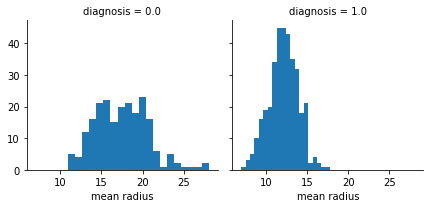

In [31]:
# To Do: Visualize hisogram for mean radius, divided by the diagnosis
g = sns.FacetGrid(df_drop, col='diagnosis')
g.map(plt.hist, 'mean radius', bins=20)
g.add_legend();

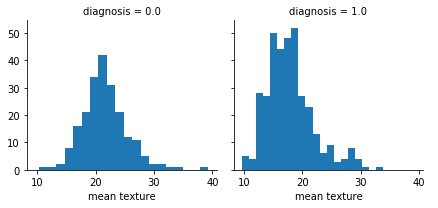

In [32]:
# To Do: Visualize hisogram for mean texture, divided by the diagnosis
g = sns.FacetGrid(df_drop, col='diagnosis')
g.map(plt.hist, 'mean texture', bins=20)
g.add_legend();

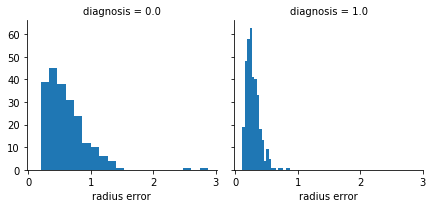

In [33]:
# To Do: Visualize hisogram for radius error, divided by the diagnosis
g = sns.FacetGrid(df_drop, col='diagnosis')
g.map(plt.hist, 'radius error', bins=20)
g.add_legend();

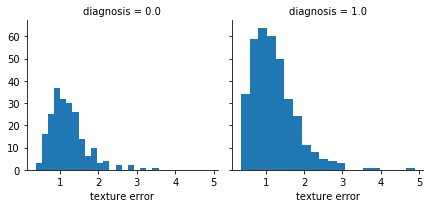

In [34]:
# To Do: Visualize hisogram for texture error, divided by the diagnosis
g = sns.FacetGrid(df_drop, col='diagnosis')
g.map(plt.hist, 'texture error', bins=20)
g.add_legend();

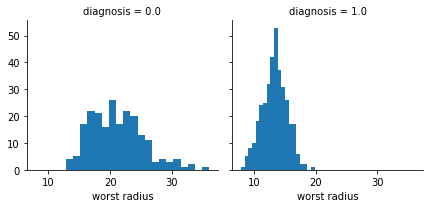

In [35]:
# To Do: Visualize hisogram for worst radius, divided by the diagnosis
g = sns.FacetGrid(df_drop, col='diagnosis')
g.map(plt.hist, 'worst radius', bins=20)
g.add_legend();

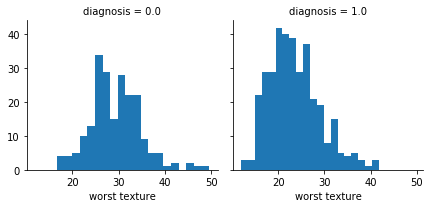

In [36]:
# To Do: Visualize hisogram for worst texture, divided by the diagnosis
g = sns.FacetGrid(df_drop, col='diagnosis')
g.map(plt.hist, 'worst texture', bins=20)
g.add_legend();

## Part 4: Split Data for Train and Test

In [37]:
# To Do: Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
# To Do: Make sure the X_train data shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 6)
(455,)
(114, 6)
(114,)


In [39]:
# To Do: Create regressor and fit data train
model = LogisticRegression(max_iter=10000, solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
# To Do: Calculate model score for data train
train_score = model.score(X_train, y_train)
print('data train - coefficient of determination:', train_score)

data train - coefficient of determination: 0.9384615384615385


In [41]:
# To Do: Calculate model score for data test
test_score = model.score(X_test, y_test)
print('data test - coefficient of determination:', test_score)

data test - coefficient of determination: 0.956140350877193


Create logistic regression model using only three features from features dataframe to predict diagnosis.
The three features must be chosen based on analysis.
Utilize pandas and seaborn to process and visualize data.
Aim for the highest score as possible as you can.

In [42]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [43]:
col = df.columns
print(col)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnosis'],
      dtype='object')


In [44]:
y = df['diagnosis']
x = df.drop('diagnosis', axis = 1)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant:  212


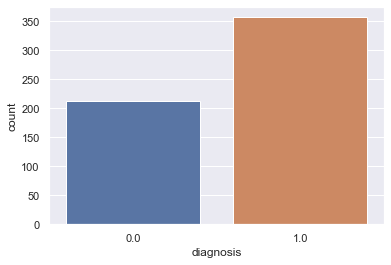

In [45]:
sns.set(style='darkgrid')
ax = sns.countplot(x = y)
B, M = y.value_counts(sort=True)
print('Number of Benign: ', B)
print('Number of Malignant: ', M)

In [46]:
x.isnull().values.any()

False

In [47]:
x.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [48]:
data = x
# Process of Normalization by Standardization
data_normal = (data - data.mean()) / (data.std())

## Visualization 

In [49]:
def violin_plot(beginning,end):
    data = pd.concat([y,data_normal.iloc[:,beginning:end]],axis=1)
    data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name='value')
    plt.figure(figsize=(10,10))
    sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart")
    plt.xticks(rotation=45)

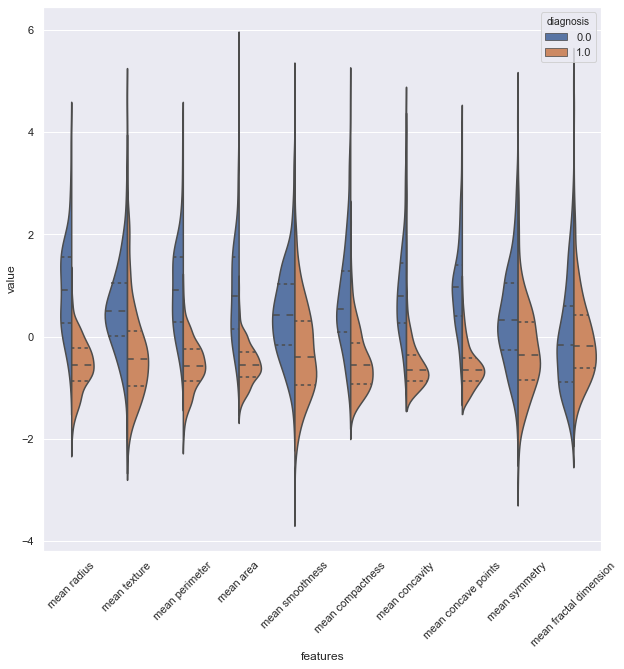

In [50]:
violin_plot(0,10)

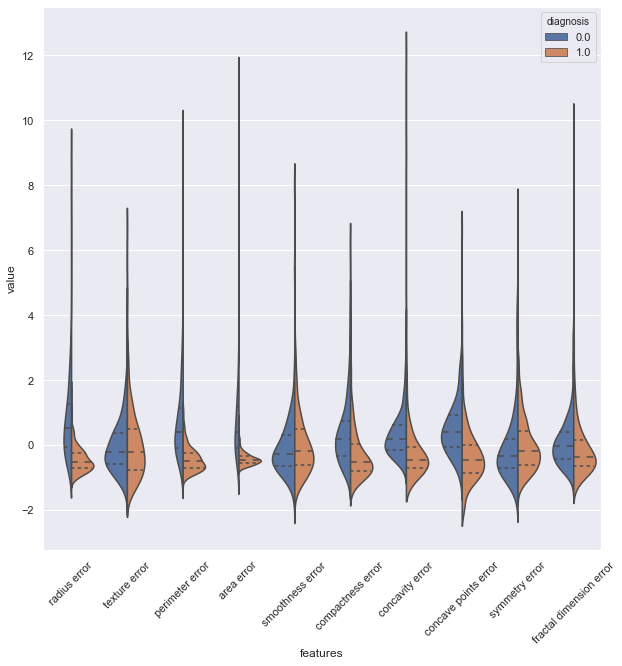

In [51]:
violin_plot(10,20)

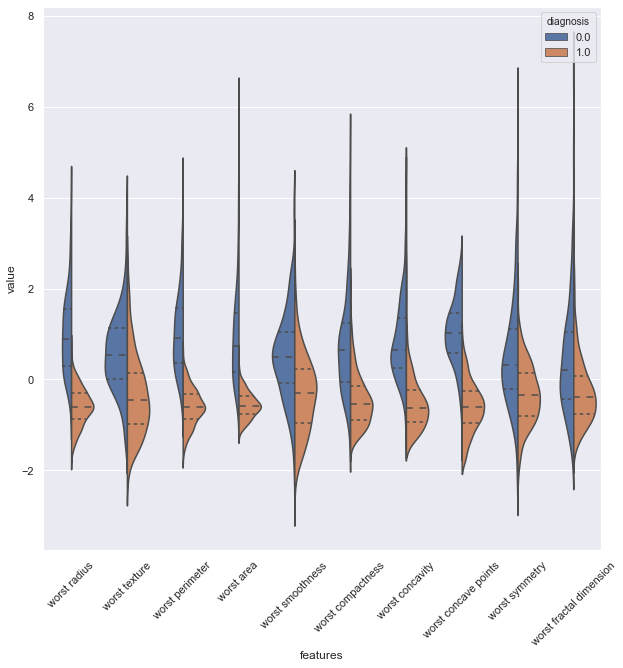

In [52]:
violin_plot(20,31)

From the graph above, we notice some similarities between radius_worst and perimeter_worst on one hand, and concavity_worst and concave points_worst on the other hand. Other similarities exist of course. If two violins look similar, it might indicate a correlation between the features, and if two features are correlated, one can ask if it's possible (or not) to drop one.

In order to compare two features, let's first use joint plot.

In [53]:
def joint_plot(feature1, feature2):
    sns.jointplot(x.loc[:,feature1], x.loc[:,feature2], kind="regg", color="#ce1414")

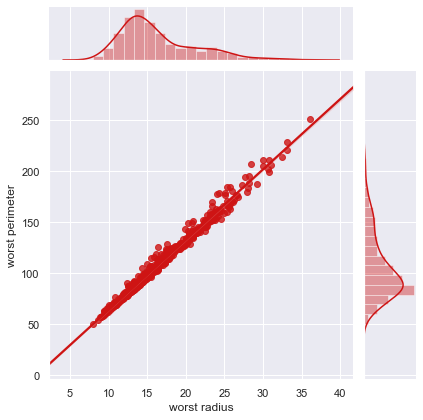

In [54]:
joint_plot('worst radius', 'worst perimeter')

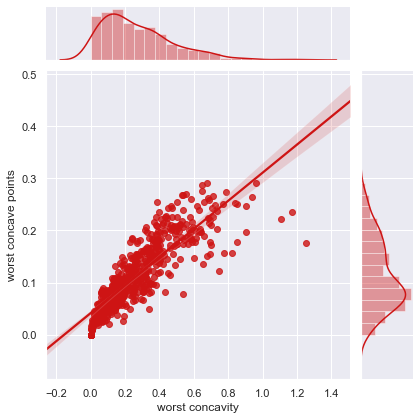

In [55]:
joint_plot('worst concavity', 'worst concave points')

Now, we look and observe for the correlation between features. We use Seaborn Heatmap Function

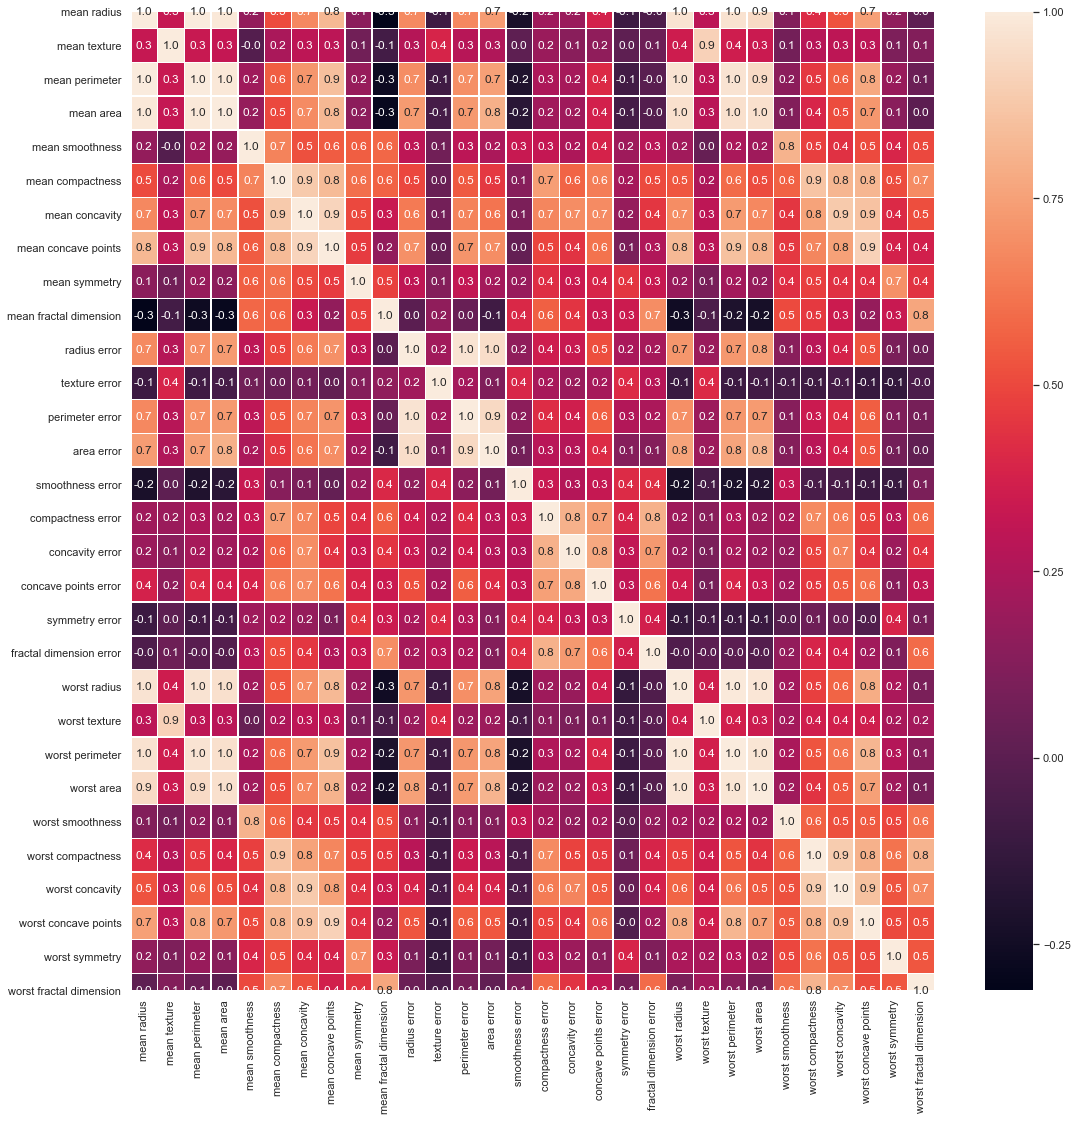

In [56]:
# Correlation Map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

We want only three features to do classification as effective and as accurate as possible. To do so, we use analysis to choose only three most important features to classify breast cancer as benign or malignant.

We will use Feature Selection with correlation and Random Forest Classification.

## Feature Selection 

Recall is:  0.9436619718309859
Accuracy is:  0.9385964912280702
F1 score is:  0.9503546099290779


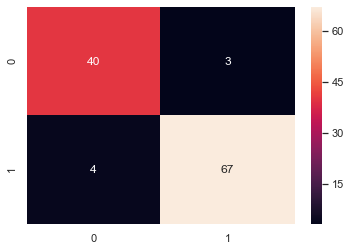

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score

# Split data train 80 % and test 20 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Random Forest Classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43, n_estimators=10)      
clr_rf = clf_rf.fit(x_train,y_train)

recall = recall_score(y_test,clf_rf.predict(x_test))
print('Recall is: ', recall)
accuracy = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ', accuracy)
f1 = f1_score(y_test,clf_rf.predict(x_test))
print('F1 score is: ', f1)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
ax = sns.heatmap(cm,annot=True,fmt="d")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [58]:
from sklearn.feature_selection import RFE

# Split data train 80% and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the RFE object and rank each pixel
clf_rf_2 = RandomForestClassifier(random_state=43, n_estimators=10)      
rfe = RFE(estimator=clf_rf_2, n_features_to_select=3, step=1)
rfe = rfe.fit(x_train, y_train)

In [59]:
print('Chosen best 3 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 3 feature by rfe: Index(['mean concave points', 'worst perimeter', 'worst concave points'], dtype='object')


Recall is:  0.9436619718309859
Accuracy is:  0.9473684210526315
F1 score is:  0.9583333333333334


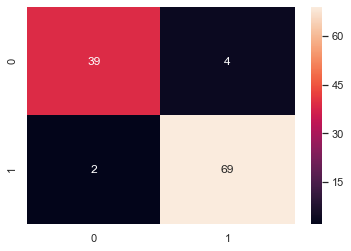

In [60]:
Recall = recall_score(y_test,rfe.predict(x_test))
print('Recall is: ', recall)
accuracy = accuracy_score(y_test,rfe.predict(x_test))
print('Accuracy is: ', accuracy)
f1 = f1_score(y_test,rfe.predict(x_test))
print('F1 score is: ', f1)
cm = confusion_matrix(y_test,rfe.predict(x_test))
ax = sns.heatmap(cm,annot=True,fmt="d")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Using Random Forest Classification, we have the best three features to do breast cancer classification which are 'mean concave points', 'worst radius' dan 'worst concave points'. We have Recall as big as 97.18%, which is a little bit better than using all features (Recall is 94.36%). We can then proceed using visualization to see how our data's working.

In [61]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [62]:
df_3_col = df[['mean concave points', 'worst radius', 'worst concave points', 'diagnosis']]
df_3_col.head()

,mean concave points,worst radius,worst concave points,diagnosis
0,0.14710,25.38,0.2654,0.0
1,0.07017,24.99,0.1860,0.0
2,0.12790,23.57,0.2430,0.0
3,0.10520,14.91,0.2575,0.0
4,0.10430,22.54,0.1625,0.0


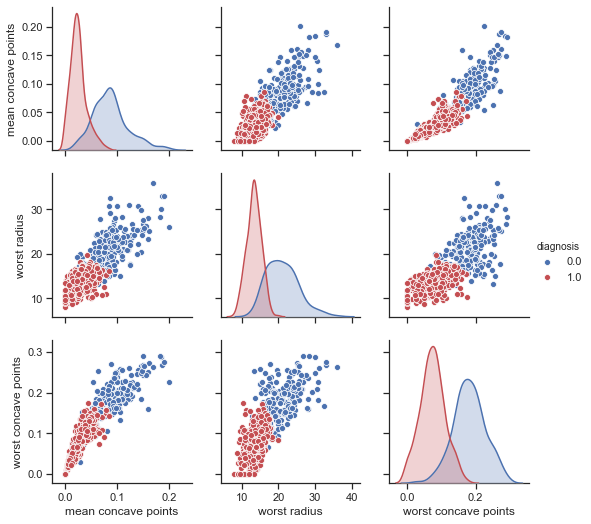

In [63]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_3_col, palette = ('b', 'r'), hue="diagnosis", height=2.5, vars=['mean concave points', 'worst radius', 'worst concave points'])
plt.show()

## New Logistic Regression

In [64]:
df_3_col_x = df_3_col.drop('diagnosis', axis = 1)
df_3_col_y = df_3_col[['diagnosis']].values.ravel()

x_train, x_test, y_train, y_test = train_test_split(df_3_col_x, df_3_col_y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(455, 3)
(455,)
(114, 3)
(114,)


In [66]:
model.score(X,y)

0.9420035149384886

In [67]:
model = LogisticRegression(max_iter=10000, solver='lbfgs')
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
train_score = model.score(x_train, y_train)
print('data train - coefficient of determination:', train_score)

data train - coefficient of determination: 0.9076923076923077


In [69]:
test_score = model.score(x_test, y_test)
print('data test - coefficient of determination:', test_score)

data test - coefficient of determination: 0.9385964912280702
